<a href="https://colab.research.google.com/github/MeeraSadhu/LetsUpgrade_DS_CapstoneProject/blob/main/CT_Scan_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [21]:
!pip install keras==2.10
!pip uninstall tensorflow
!pip install tf-nightly
from keras.utils.np_utils import to_categorical

from tqdm import tqdm

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model 
from keras.layers import Input
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.10.0 which is incompatible.
Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tens

In [23]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam


In [15]:
from google.colab import drive
drive.mount('/content/gdrive/')
!ls "/content/gdrive/MyDrive/dataset/CapstoneProject"



Mounted at /content/gdrive/
COVID  non-COVID


In [44]:
dataset="/content/gdrive/MyDrive/dataset/CapstoneProject"


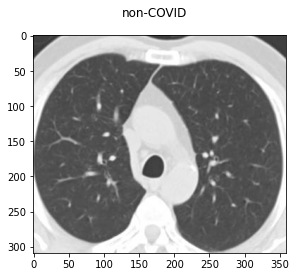

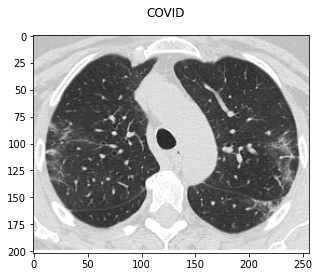

In [16]:
import glob
import matplotlib.image as mpimg
nonCOVID_images = []
for img_path in glob.glob(dataset + '/non-COVID/*'):
    nonCOVID_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('non-COVID')
plt.imshow(nonCOVID_images[0], cmap='gray') 

COVID_images = []
for img_path in glob.glob(dataset + '/COVID/*'):
    COVID_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('COVID')
plt.imshow(COVID_images[0], cmap='gray')

In [17]:
disease_types = ['COVID', 'non-COVID']

train_dir = data_dir = '/content/gdrive/MyDrive/dataset/CapstoneProject'

train_data = []

for index, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append([sp + "/" + file, index, sp])
        
train = pd.DataFrame(train_data, columns = ['File', 'ID','Disease Type'])
train.head()

,File,ID,Disease Type
0,COVID/Covid (1).png,0,COVID
1,COVID/Covid (1005).png,0,COVID
2,COVID/Covid (1000).png,0,COVID
3,COVID/Covid (1004).png,0,COVID
4,COVID/Covid (1003).png,0,COVID


In [49]:
IMAGE_SIZE = 150
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

Setting up the fixed size to image

In [50]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X_Train = X_train / 255.
print(X_Train.shape)

1440it [00:24, 58.68it/s]


(1440, 64, 64, 3)


In [51]:
Y_train = train['ID'].values
Y_train = to_categorical(Y_train, num_classes=2)

In [52]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.1)

In [57]:
BATCH_SIZE = 64
EPOCHS = 100
SIZE=64
N_ch=3

In [37]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = resnet50(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0, )
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [38]:
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy

Training with the Model Resnet50.
   Mentioning args , 
   Model Check Point,
   Early Stopping.

In [54]:
model = build_resnet50()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('ResNet50_Model.hdf5', verbose=1, save_best_only=True)
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
datagen = ImageDataGenerator(rotation_range=360, 
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        zoom_range=0.2, 
                        horizontal_flip=True, 
                        vertical_flip=True) 

datagen.fit(X_train)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_16 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 2048)              0   

In [58]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/5
20/20 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.7703 
Epoch 1: val_loss did not improve from 0.37660
20/20 [==============================] - 239s 12s/step - loss: 0.5242 - accuracy: 0.7703 - val_loss: 9.4613 - val_accuracy: 0.1250 - lr: 0.0021
Epoch 2/5
20/20 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.7930 
Epoch 2: val_loss did not improve from 0.37660
20/20 [==============================] - 235s 12s/step - loss: 0.5140 - accuracy: 0.7930 - val_loss: 14.2416 - val_accuracy: 0.1250 - lr: 0.0021
Epoch 3/5
20/20 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8247 
Epoch 3: val_loss did not improve from 0.37660
20/20 [==============================] - 233s 12s/step - loss: 0.4298 - accuracy: 0.8247 - val_loss: 3.4131 - val_accuracy: 0.1250 - lr: 0.0021
Epoch 4/5
20/20 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8385 
Epoch 4: val_loss did not improve from 0.37660
20/

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Plotting Traing and Validation Data

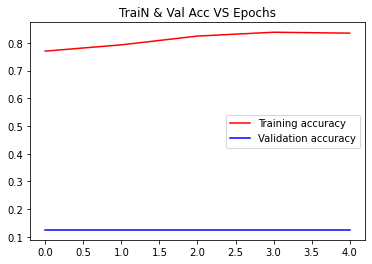

<Figure size 432x288 with 0 Axes>

In [60]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

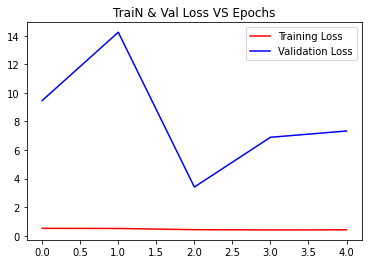

<Figure size 432x288 with 0 Axes>

In [61]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

Model Evaluation with Test Loss and Test Accuracy

In [62]:
model.load_weights("ResNet50_Model.hdf5")
score = model.evaluate(X_val, Y_val ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

5/5 [==============================] - 2s 435ms/step - loss: 0.3766 - accuracy: 0.8750
Test Loss: 0.376598596572876
Test accuracy: 87.5


confusion Matrix 

5/5 [==============================] - 4s 449ms/step


Text(0.5, 1.0, 'Confusion Matrix')

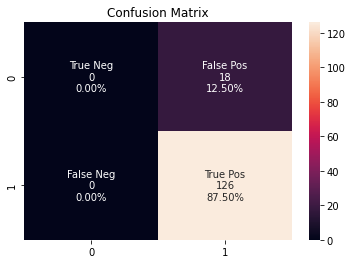

In [63]:
Y_pred = model.predict(X_val)
Y_predx = np.argmax(Y_pred, axis = -1)
Y_valx = np.argmax(Y_val, axis = -1)
cf_matrix = confusion_matrix(Y_valx, Y_predx)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '')
plt.title("Confusion Matrix") 